# Preprocessing for simulation 4

## Effects at phylum level and order level with Mis-specified tree information

@ Aug. 16, Youngwon (youngwon08@gmail.com)

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils.extmath import softmax as softmax
from scipy.special import expit as sigmoid
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "./data/simulation/s4"
path_genus = "./data/genus48"

def relu(x): 
    x[x <= 0.] = 0.
    return x

## Phylogenetic Tree information

In [3]:
## TODO: Should we start with genus48.csv?

phylogenetic_tree_info = pd.read_csv('%s/genus48_dic_misspecify.csv' % path_genus)
# tree_level_list = ['Genus', 'Family', 'Order', 'Class', 'Phylum']
phylogenetic_tree_info = phylogenetic_tree_info.iloc[:,::-1]
tree_level_list = phylogenetic_tree_info.columns.tolist()
phylogenetic_tree_info

,Genus,Family,Order,Class,Phylum
0,Streptococcus,Streptococcaceae,Lactobacillales,Bacilli,Firmicutes
1,Tropheryma,Cellulomonadaceae,Actinomycetales,Actinobacteria,Actinobacteria
2,Veillonella,Veillonellaceae,Selenomonadales,Negativicutes,Firmicutes
3,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
4,Flavobacterium,Flavobacteriaceae,Flavobacteriales,Flavobacteria,Bacteroidetes
5,Prevotella,Prevotellaceae,Bacteroidales,Bacteroidia,Bacteroidetes
6,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes
7,Parvimonas,Clostridiales_Incertae_Sedis_XI,Clostridiales,Bacilli,Firmicutes
8,Fusobacterium,Fusobacteriaceae,Fusobacteriales,Fusobacteria,Fusobacteria
9,Propionibacterium,Propionibacteriaceae,Actinomycetales,Actinobacteria,Actinobacteria


In [4]:
print('------------------------------------------------------------------------------------------')
print('Phylogenetic tree level list: %s' % tree_level_list)
print('------------------------------------------------------------------------------------------')
phylogenetic_tree_dict = {'Number':{}}
for tree_lvl in tree_level_list:
    lvl_category = phylogenetic_tree_info[tree_lvl].unique()
    lvl_num = lvl_category.shape[0]
    print('%6s: %d' % (tree_lvl, lvl_num))
    phylogenetic_tree_dict[tree_lvl] = dict(zip(lvl_category, np.arange(lvl_num)))
    phylogenetic_tree_dict['Number'][tree_lvl]=lvl_num
print('------------------------------------------------------------------------------------------')
print('Phylogenetic_tree_dict info: %s' % list(phylogenetic_tree_dict.keys()))
print('------------------------------------------------------------------------------------------')

------------------------------------------------------------------------------------------
Phylogenetic tree level list: ['Genus', 'Family', 'Order', 'Class', 'Phylum']
------------------------------------------------------------------------------------------
 Genus: 48
Family: 40
 Order: 22
 Class: 16
Phylum: 9
------------------------------------------------------------------------------------------
Phylogenetic_tree_dict info: ['Class', 'Genus', 'Order', 'Phylum', 'Number', 'Family']
------------------------------------------------------------------------------------------


In [5]:
phylogenetic_tree = phylogenetic_tree_info
for tree_lvl in tree_level_list:
    phylogenetic_tree[tree_lvl] = phylogenetic_tree[tree_lvl].map(phylogenetic_tree_dict[tree_lvl])
phylogenetic_tree = np.array(phylogenetic_tree)
phylogenetic_tree

array([[ 0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  0],
       [ 3,  3,  1,  1,  1],
       [ 4,  4,  3,  3,  2],
       [ 5,  5,  4,  4,  2],
       [ 6,  6,  4,  4,  2],
       [ 7,  7,  5,  0,  0],
       [ 8,  8,  6,  5,  3],
       [ 9,  9,  1,  1,  1],
       [10, 10,  7,  0,  0],
       [11, 11,  1,  1,  1],
       [12, 12,  0,  0,  0],
       [13, 13,  8,  6,  4],
       [14, 14,  0,  0,  0],
       [15,  2,  2,  2,  0],
       [16, 15,  5,  0,  0],
       [17, 16,  1,  1,  1],
       [18, 17,  9,  7,  4],
       [19,  4,  4,  4,  2],
       [20, 18, 10,  8,  0],
       [21, 15,  5,  0,  0],
       [22, 19, 11,  9,  5],
       [23, 20,  7,  0,  0],
       [24, 21,  5,  0,  0],
       [25, 15,  5,  0,  0],
       [26, 22, 12,  6,  4],
       [27, 23,  6,  5,  3],
       [28, 24, 13, 10,  6],
       [29, 25, 14, 11,  4],
       [30, 26, 15, 11,  4],
       [31,  2,  2,  2,  0],
       [32, 27,  1,  1,  1],
       [33, 28, 16, 12,  4],
       [34, 29

In [6]:
tree_weight_list = []
tree_weight_noise_list = []
num_dict = phylogenetic_tree_dict['Number']
for i in range(len(tree_level_list)-1):
    print('Build edge weights between [%6s, %6s]'%(tree_level_list[i],tree_level_list[i+1]))
    lower = phylogenetic_tree[:,i]
    upper = phylogenetic_tree[:,i+1]
    n_lower = num_dict[tree_level_list[i]]
    n_upper = num_dict[tree_level_list[i+1]]

    tree_w = np.zeros((n_lower,n_upper))
    tree_w_n = np.zeros_like(tree_w) + 0.01
    for j in range(n_upper):
        tree_w[lower[j==upper],j] = 1.
        tree_w_n[lower[j==upper],j] = 1.
    tree_weight_list.append(tree_w)
    tree_weight_noise_list.append(tree_w_n)
#     pd.DataFrame(tree_weight_noise_list[-1]).to_csv('%s/mw%d.csv' % (path, i+1), index=False)

Build edge weights between [ Genus, Family]
Build edge weights between [Family,  Order]
Build edge weights between [ Order,  Class]
Build edge weights between [ Class, Phylum]


### Check Error

In [7]:
# maskw_l1 = np.array(pd.read_csv('%s/mw1.csv' % path))
# maskw_l2 = np.array(pd.read_csv('%s/mw2.csv' % path))
# maskw_l3 = np.array(pd.read_csv('%s/mw3.csv' % path))
# maskw_l4 = np.array(pd.read_csv('%s/mw4.csv' % path))
# maskw_list = [maskw_l1,maskw_l2,maskw_l3,maskw_l4]
# print([np.sum(np.abs(tw-mw)) for tw, mw in zip(tree_weight_noise_list, maskw_list)])

# Regression effected with order level and phylum level selections

Aug. 10, 2019

## Experiments with 1000 replications

## Generating X: microbiome abundance data
* Using the data that Jing made, described in detail by Zhai et al. (2018a,b).
    * $n \times p$ OTU count matrix
    * Aggregating $p_0=2964$ OTUs to $p=48$ genus
* Sample size for each replication: $n = 1000$
    * Training $75%$; Test $25%$

* Phylogenetic tree levels:
    1. Genus: $m^0 = 48$
    1. Family: $m^1 = 40$
    1. Order: $m^2 = 23$
    1. Class: $m^3 = 17$
    1. Phylum: $m^4 = 9$

## Generation Y: a forward propagation approach

###  Ver 0: same weights with same true connection for each repeatition

#### (similar to the original version)

$x^0 = x^{input} \in \mathbb{R}^{n\times p}$ (input genus abundance data)

#### Before repeatition, 

* Select the true connection to disease (based on the phylogenetic tree information)
    1. Choose 4 indexes from the order nodes
    1. Construct the disease path according to the chosen order nodes.

* Construct the true weights. 
    1. For $i = 1,2,...,4$, $w^{i} \in \mathbb{R}^{m^{i-1} \times m^{i}}, b^{i} \in \mathbb{R}^{m^{i} \times 1},$
       $$w^{i}_{j,k} \sim \left\{\begin{matrix}
       \text{Uniform}(-2.5,3) \quad\quad  \text{associated with the disease} \\
%        \mathcal{N}(0,0.0001) \quad\quad  \text{not associaated with the disease} \\
       0 \quad\quad  \text{not associaated with the disease} \\
       0 \quad\quad\quad \text{not associaated with the phylogenetic trees}
       \end{matrix}\right.$$
       $$b^{i}_{k} \sim \mathcal{N}(0,4)$$

#### For each repeatition, 

* For $i = 1,2,...,4$,
    1. $h^i = w^{i} x^{i-1} + b^i$
    1. $x^{i} = \text{ReLU}(h^i) \in \mathbb{R}^{m^{i}}$
* For the last layer for the classification with the K classes:
    1. $y=x^{5} = w^{5}x^{4}+b^{5}$

In [14]:
verbose=False
count_path = 'data/simulation/count/'
x_list = np.array(pd.read_csv('data/simulation/gcount_list.csv', header=None)[0])
np.random.seed(17)
print('-------------------------------------------------------------------------------')
print('Generation True Connection to disease')
order_idx = np.array([5,4,1,9]) # 5(0) and 4(2) are effect at order level, 1(1) and 9(1) are effects at phylum level
phylum_idx = np.array([1,0,2]) # 1(1, 9) are effect at phylum level, 1(6) and 3(5) are effects at order level
class_idx = np.array([1,4,0])

true_tree_idx_list = []
for i in range(5):
    idx_order = np.unique(np.concatenate([phylogenetic_tree[:,i][phylogenetic_tree[:,2]==k] for k in order_idx]))
    idx_class = np.unique(np.concatenate([phylogenetic_tree[:,i][phylogenetic_tree[:,3]==k] for k in class_idx]))
    idx_phylum = np.unique(np.concatenate([phylogenetic_tree[:,i][phylogenetic_tree[:,4]==k] for k in phylum_idx]))
    idx = np.intersect1d(idx_order, idx_phylum)
    idx = np.intersect1d(idx, idx_class)
    print("%6s idx: %s"% (tree_level_list[i], idx))
    true_tree_idx_list.append(idx)
print('------------------------------------------------------------------------------------------')
true_tree_weight_list = []
num_dict = phylogenetic_tree_dict['Number']
for i in range(len(tree_level_list)-1):
    print('Build true edge weights between [%6s, %6s]'%(tree_level_list[i],tree_level_list[i+1]))
    lower = phylogenetic_tree[:,i]
    upper = phylogenetic_tree[:,i+1]
    n_lower = num_dict[tree_level_list[i]]
    n_upper = num_dict[tree_level_list[i+1]]
    tree_w = np.zeros((n_lower,n_upper), dtype=np.float32)
    for j in true_tree_idx_list[i]:
        tree_w[j,upper[lower==j]] = 1.
    true_tree_weight_list.append(tree_w)
    np.save('%s/ver0/tw_%d.npy'%(path,i+1), np.repeat([tree_w], x_list.shape[0], axis=0))
    print('Saved true edge weights between [%6s, %6s] to %s/ver0/tw_%d.npy'%(tree_level_list[i],tree_level_list[i+1],path,i+1))

print('-------------------------------------------------------------------------------')
print('Generation y')

yweight_list = []
ybias_list = []
for i in range(len(true_tree_weight_list)):
    yw = np.random.uniform(-2.5,3., true_tree_weight_list[i].shape).astype(np.float32) * true_tree_weight_list[i] # left only the weights on the true connections to the disease
    yb = np.random.normal(0,4, true_tree_weight_list[i].shape[-1]).astype(np.float32)
    yw = np.repeat([yw], x_list.shape[0], axis=0)
    yb = np.repeat([yb], x_list.shape[0], axis=0)
    yweight_list.append(yw)
    ybias_list.append(yb)
    np.save('%s/ver0/solw_%d.npy'%(path,i), yw)
    np.save('%s/ver0/solb_%d.npy'%(path,i), yb)
    
ywc = np.zeros((true_tree_weight_list[3].shape[-1],1), dtype=np.float32)
ywc[:3,0] = np.random.uniform(-2.5,3., 3).astype(np.float32)
# ywc = np.expand_dims(np.array([-0.025, 0.15, -0.35, 0, 0, 0, 0, 0, 0]), axis=-1)
ywc[:,0] = ywc[:,0] * (np.sum(true_tree_weight_list[-1], axis=0) > 0).astype(np.float32)
ywc = np.repeat([ywc], x_list.shape[0], axis=0)
ybc = np.random.normal(0,4, ywc.shape[-1]).astype(np.float32)
ybc = np.repeat([ybc], x_list.shape[0], axis=0)
np.save('%s/ver0/solw_%d.npy'%(path,len(true_tree_weight_list)), ywc)
# np.save('%s/ver0/solb_%d.npy'%(path,len(true_tree_weight_list)), ybc)

newy_all = []
for fold in range(x_list.shape[0]):
    x = pd.read_csv('%s/%s'%(count_path, x_list[fold])) # input x
    mat = np.matrix(x)
    prepro = MinMaxScaler()
    prepro.fit(mat)
    x = pd.DataFrame(prepro.transform(mat), columns = list(x.columns))
    h = np.array(x, dtype=np.float32)
    for i, (yw, yb) in enumerate(zip(yweight_list,ybias_list)):
        yw_noise = yw[fold]
#         yw_noise += np.random.normal(0,0.0001, true_tree_weight_list[i].shape) \
#                     *(1.-true_tree_weight_list[i])*(tree_weight_list[i]) # add noise on the tree
        h = relu(np.dot(h, yw_noise) + np.repeat([yb[fold]], h.shape[0], axis=0))
    h = np.dot(h, ywc[fold])
    p = h + np.repeat([ybc[fold]], h.shape[0], axis=0)
    newy = p[:,0]
    newy_all.append(newy)
newy_all = pd.DataFrame(np.stack(newy_all).T)
newy_all.to_csv('%s/ver0/y.csv'%path, index=False)
np.save('%s/ver0/solb_%d.npy'%(path,len(true_tree_weight_list)), ybc)

-------------------------------------------------------------------------------
Generation True Connection to disease
 Genus idx: [ 1  3  5  6  7  9 11 16 17 19 21 24 25 32 37 38 40 41 44 46 47]
Family idx: [ 1  3  4  5  6  7  9 11 15 16 21 27 32 34 38 39]
 Order idx: [1 4 5]
 Class idx: [0 1 4]
Phylum idx: [0 1 2]
------------------------------------------------------------------------------------------
Build true edge weights between [ Genus, Family]
Saved true edge weights between [ Genus, Family] to ./data/simulation/s4/ver0/tw_1.npy
Build true edge weights between [Family,  Order]
Saved true edge weights between [Family,  Order] to ./data/simulation/s4/ver0/tw_2.npy
Build true edge weights between [ Order,  Class]
Saved true edge weights between [ Order,  Class] to ./data/simulation/s4/ver0/tw_3.npy
Build true edge weights between [ Class, Phylum]
Saved true edge weights between [ Class, Phylum] to ./data/simulation/s4/ver0/tw_4.npy
------------------------------------------------

/DATA/home/muha/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
newy_all

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-2.379842,-2.391030,-2.409753,-2.380874,-2.258020,-2.386111,-1.875960,-2.600266,-2.405330,-2.639464,...,-2.649870,-2.329659,-2.284834,-2.491580,-2.650355,-2.316209,-2.387145,-2.471001,-2.351284,-2.151437
1,-2.392650,-2.178348,-2.421427,-2.382262,-3.182736,-2.598511,-2.398827,-2.129116,-2.428067,-2.389453,...,-2.192367,-2.106557,-2.528952,-2.444502,-2.431087,-2.244340,-2.382110,-2.401302,-2.358226,-2.823409
2,-2.348658,-2.426980,-2.519825,-2.388474,-2.472501,-2.388195,-2.456442,-2.260780,-2.109559,-2.383302,...,-2.323130,-2.200727,-2.259720,-2.573662,-2.854690,-2.313637,-2.523037,-2.578377,-2.361122,-2.485506
3,-2.383401,-2.392002,-2.515819,-2.386102,-2.356030,-2.411725,-2.289613,-2.877716,-2.564155,-2.269286,...,-2.390967,-2.941591,-2.382534,-2.411191,-2.472122,-2.503752,-2.119376,-2.605431,-2.398415,-2.463591
4,-2.465105,-2.388860,-2.492586,-2.344519,-2.360831,-2.632733,-2.660200,-2.758928,-2.392649,-2.400873,...,-2.250404,-2.384514,-2.409162,-2.467511,-2.411808,-2.435936,-2.664423,-2.505676,-1.952381,-2.390627
5,-2.575892,-2.352169,-2.543291,-2.437994,-2.559832,-2.347442,-2.363267,-2.590667,-2.400312,-2.668925,...,-2.385923,-2.441730,-2.404744,-2.409885,-2.724277,-2.785563,-2.384574,-2.399885,-2.596019,-2.432738
6,-2.440152,-2.349933,-2.588806,-2.633914,-2.402954,-2.400964,-2.361063,-2.369345,-2.449917,-2.384025,...,-2.387646,-2.392296,-2.368016,-2.414759,-2.407797,-3.090858,-2.390698,-2.342938,-2.580586,-2.521347
7,-2.330755,-2.367849,-2.522042,-2.507629,-2.042945,-2.372441,-2.563173,-2.585770,-2.389553,-2.634781,...,-2.436083,-2.122557,-2.363278,-2.323301,-2.390903,-2.475561,-2.573103,-2.229576,-2.817017,-2.393083
8,-2.441644,-2.308843,-2.373317,-2.389553,-2.209890,-2.595905,-2.336594,-3.182736,-2.538843,-2.487695,...,-2.318677,-1.988677,-2.385921,-2.453606,-2.425232,-2.360163,-2.443465,-2.427814,-2.201410,-2.400908
9,-2.829486,-2.370419,-2.238831,-2.450782,-2.386419,-2.625506,-2.363894,-2.418674,-2.395160,-2.344523,...,-2.387752,-2.282434,-2.498866,-2.534035,-2.387837,-2.527081,-2.386147,-2.283362,-2.387117,-2.403459


(array([2.02160e+04, 4.41550e+04, 1.62107e+05, 6.47821e+05, 1.04745e+05,
        1.64680e+04, 4.07100e+03, 3.82000e+02, 2.80000e+01, 7.00000e+00]),
 array([-3.1827364 , -2.96029702, -2.73785764, -2.51541826, -2.29297888,
        -2.0705395 , -1.84810013, -1.62566075, -1.40322137, -1.18078199,
        -0.95834261]),
 <a list of 10 Patch objects>)

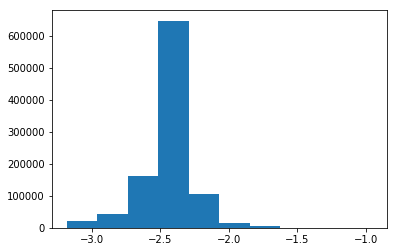

In [16]:
plt.hist(np.array(newy_all).flatten())